In [1]:
%load_ext autoreload

%autoreload 2

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

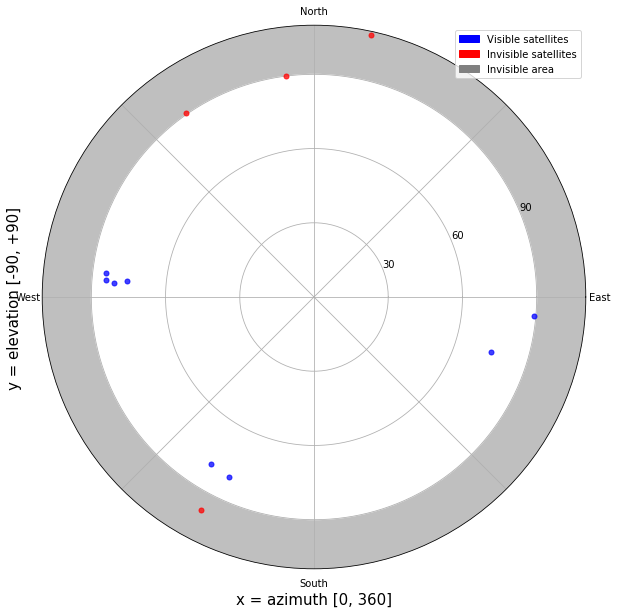

In [3]:
from tracker import plotter

n = 12
az = np.random.uniform(size=n) * 360.0
el = np.random.uniform(low=-1.0, high=1.0, size=n) * 20

plotter.plot_az_el(az, el)
plt.show()

In [11]:
from tracker.tle_getter import get_tle

OBS_LAT = -15.989620
OBS_LON = -48.044411
OBS_ALT = 500 # meters


ISS_TLE = ('1 25544U 98067A   18264.87214538 -.00000479 +00000-0 +00000-0 0 9990',
           '2 25544 051.6411 256.8919 0004651 185.2142 246.8508 15.53744581133552')
ISS_TLE = get_tle(name='ISS')
print('ISS_TLE = {}'.format(ISS_TLE))

ISS_TLE = ('1 25544U 98067A   18293.68683527  .00001370  00000-0  28211-4 0  9997', '2 25544  51.6422 113.3122 0003595 314.7293 122.2925 15.53843939138034')


In [19]:
from tracker.satellite import Satellite
from datetime import datetime, timezone

iss = Satellite(ISS_TLE[0], ISS_TLE[1])
utc_satview = datetime(year=2018,
                       month=10,
                       day=10,
                       hour=22,
                       minute=1,
                       second=35,
                       tzinfo=timezone.utc)

iss_position, v = iss.propagate(utc_satview)

print('iss_position = {}'.format(iss_position))
b = (768350.0713588104, 6538760.196343955, -1632694.711713458)

print(iss_position == b)

iss_position = (1530915.878394812, -4512838.377553553, 4822612.368557387)
False


In [24]:
def get_row(satview_az, satview_el, sat, lat, lon, alt, date):
    az, el = sat.get_observer_azimuth_elevation(lat, lon, alt, date=date)
    return [satview_az, satview_el, az, el, date]

In [79]:
rows = []

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=3,
                       second=58,
                       tzinfo=timezone.utc)
rows.append(get_row(137.88, -44.77, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=46,
                       second=34,
                       tzinfo=timezone.utc)
rows.append(get_row(317.97, -51.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=51,
                       second=13,
                       tzinfo=timezone.utc)
rows.append(get_row(313.60, -43.08, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=52,
                       second=53,
                       tzinfo=timezone.utc)
rows.append(get_row(311.97, -39.89, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=55,
                       second=27,
                       tzinfo=timezone.utc)
rows.append(get_row(309.25, -34.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

In [105]:

df_comparison = pd.DataFrame(rows, columns=['SatView azimuth', 'SatView elevation', 'Calculated azimuth', 'Calculated elevation', 'Date'])
df_comparison['Azimuth error'] = (df_comparison['SatView azimuth'] - df_comparison['Calculated azimuth']).abs()
df_comparison['Elevation error'] = (df_comparison['SatView elevation'] - df_comparison['Calculated elevation']).abs()
column_order = ['SatView azimuth', 'SatView elevation', 'Calculated azimuth',
       'Calculated elevation', 'Azimuth error', 'Elevation error', 'Date', ]

df_comparison = df_comparison[column_order]
display(df_comparison)
pd.options.display.float_format = '${:,.2f}'.format

values = df_comparison.values

,SatView azimuth,SatView elevation,Calculated azimuth,Calculated elevation,Azimuth error,Elevation error,Date
0,$137.88,$-44.77,$137.37,$-45.22,$0.51,$0.45,2018-10-20 22:03:58+00:00
1,$317.97,$-51.94,$317.44,$-52.43,$0.53,$0.49,2018-10-20 22:46:34+00:00
2,$313.60,$-43.08,$313.07,$-43.57,$0.53,$0.49,2018-10-20 22:51:13+00:00
3,$311.97,$-39.89,$311.44,$-40.37,$0.53,$0.48,2018-10-20 22:52:53+00:00
4,$309.25,$-34.94,$308.72,$-35.41,$0.53,$0.47,2018-10-20 22:55:27+00:00


In [130]:
def dataframe_to_latex(df):
    values = df.values
    for r in values:
        for i, x in enumerate(r):
            if i > 0:
                print(' & ', end='')
            if isinstance(x, datetime):
                print(x.strftime('%d/%m/%Y %H:%M:%S'), end='')
            else:
                print('{:.2f}'.format(x), end='')
        print(' \\\\ \\hline')
dataframe_to_latex(df_comparison)

137.88 & -44.77 & 137.37 & -45.22 & 0.51 & 0.45 & 20/10/2018 22:03:58 \\ \hline
317.97 & -51.94 & 317.44 & -52.43 & 0.53 & 0.49 & 20/10/2018 22:46:34 \\ \hline
313.60 & -43.08 & 313.07 & -43.57 & 0.53 & 0.49 & 20/10/2018 22:51:13 \\ \hline
311.97 & -39.89 & 311.44 & -40.37 & 0.53 & 0.48 & 20/10/2018 22:52:53 \\ \hline
309.25 & -34.94 & 308.72 & -35.41 & 0.53 & 0.47 & 20/10/2018 22:55:27 \\ \hline


# Erro médio

In [125]:
df_err = df_comparison[['Azimuth error', 'Elevation error']].describe()
df_err.drop(['count', 'min', '25%', '50%', '75%'], inplace=True)
display(df_err)

,Azimuth error,Elevation error
mean,$0.53,$0.48
std,$0.01,$0.01
max,$0.53,$0.49


STEP = 2


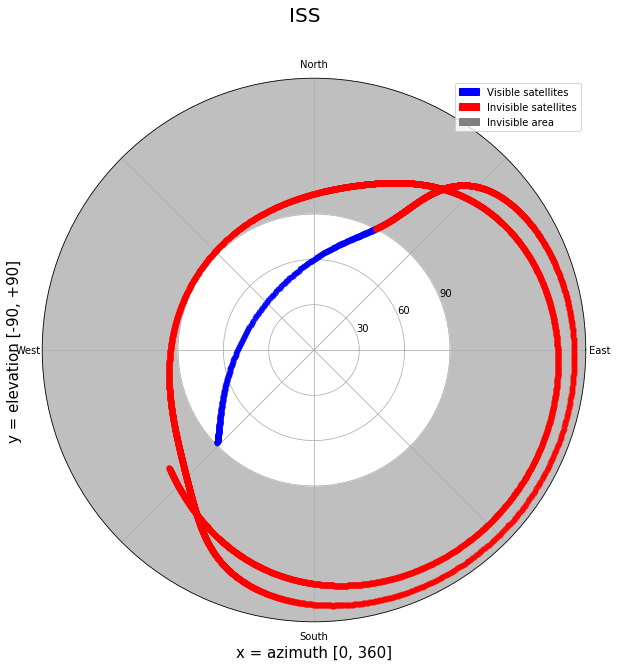

None

In [127]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=3,
                 hour=11,
                 minute=57,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=3600 * 3)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=10000, annotate=False, title='ISS')
plt.show()
display(df)